In [4]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)




In [5]:

# Load the dataset
df = pd.read_csv("Coffee Shop Sales.csv")
df.head()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.00,01-01-2023,07:06:11,2.00,5.00,Lower Manhattan,32.00,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.00,01-01-2023,07:08:56,2.00,5.00,Lower Manhattan,57.00,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.00,01-01-2023,07:14:04,2.00,5.00,Lower Manhattan,59.00,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.00,01-01-2023,07:20:24,1.00,5.00,Lower Manhattan,22.00,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.00,01-01-2023,07:22:41,2.00,5.00,Lower Manhattan,57.00,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (149116, 11)

Column Names:
 Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

Data Types:
 transaction_id      float64
transaction_date     object
transaction_time     object
transaction_qty     float64
store_id            float64
store_location       object
product_id          float64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

Missing Values:
 transaction_id      2
transaction_date    2
transaction_time    2
transaction_qty     2
store_id            2
store_location      2
product_id          2
unit_price          2
product_category    2
product_type        2
product_detail      2
dtype: int64


In [10]:
# ✅ Convert date and time columns correctly
df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time

# ✅ Create new columns
df['Month'] = df['transaction_date'].dt.month_name()
df['Day'] = df['transaction_date'].dt.day
df['Weekday'] = df['transaction_date'].dt.day_name()

# ✅ Extract hour from time
df['Hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

# ✅ Sales column
df['Sales'] = df['unit_price'] * df['transaction_qty']

# ✅ Remove duplicates
df.drop_duplicates(inplace=True)

df.head()



,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month,Day,Weekday,Hour,Sales
0,1.00,2023-01-01,07:06:11,2.00,5.00,Lower Manhattan,32.00,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,January,1.00,Sunday,7.00,6.00
1,2.00,2023-01-01,07:08:56,2.00,5.00,Lower Manhattan,57.00,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,1.00,Sunday,7.00,6.20
2,3.00,2023-01-01,07:14:04,2.00,5.00,Lower Manhattan,59.00,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,January,1.00,Sunday,7.00,9.00
3,4.00,2023-01-01,07:20:24,1.00,5.00,Lower Manhattan,22.00,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,January,1.00,Sunday,7.00,2.00
4,5.00,2023-01-01,07:22:41,2.00,5.00,Lower Manhattan,57.00,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,January,1.00,Sunday,7.00,6.20


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a clean style
sns.set(style='whitegrid', palette='Set2')
plt.rcParams['figure.figsize'] = (10, 6)


# daily Sales Trend

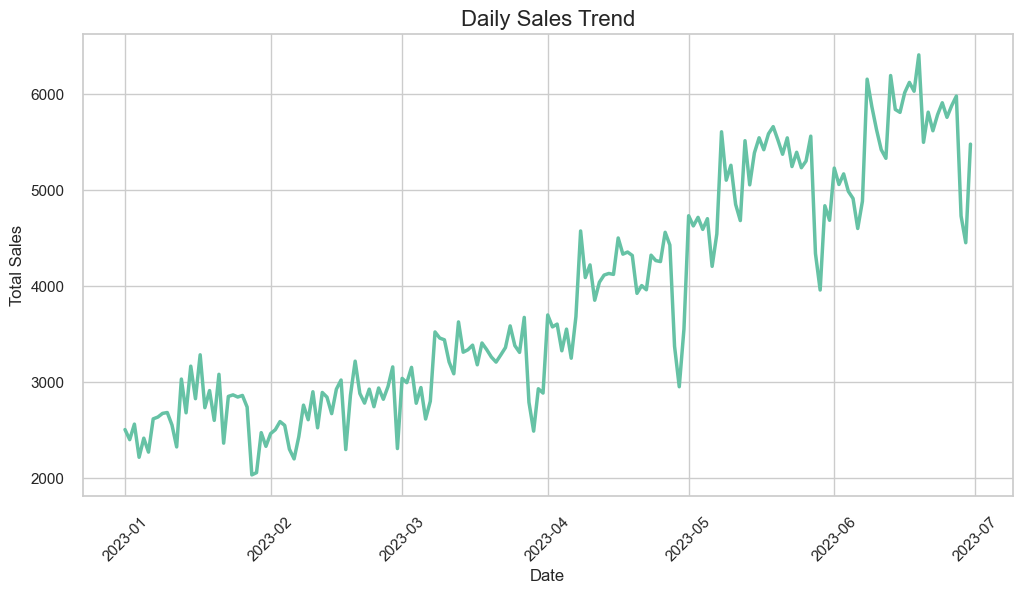

In [12]:
daily_sales = df.groupby('transaction_date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_date', y='Sales', data=daily_sales, linewidth=2.5)
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Total Sales by Month

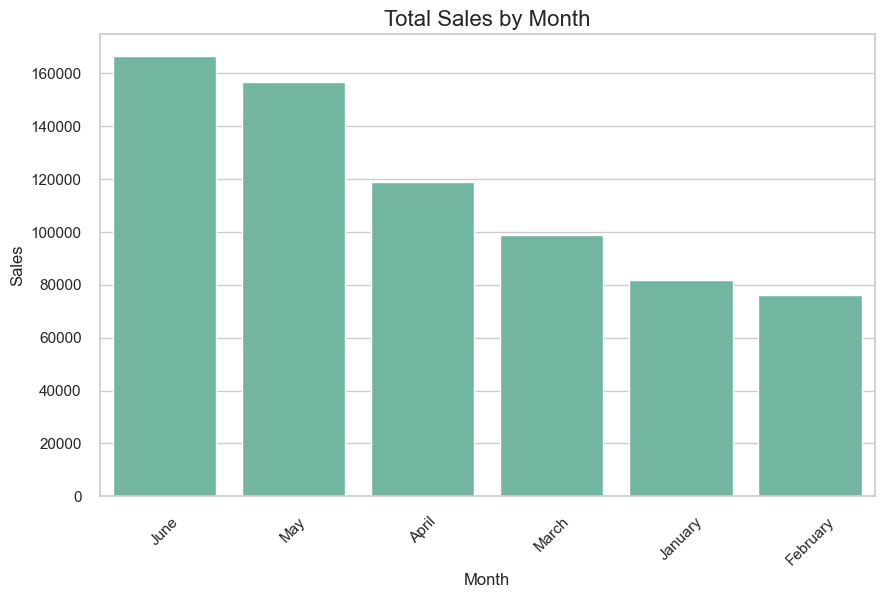

In [13]:
monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


# Sales by Day of Week

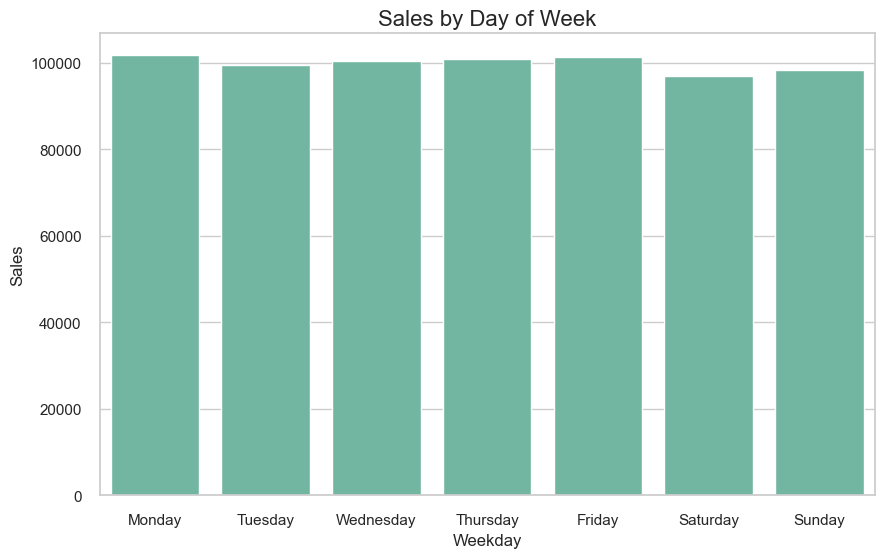

In [14]:
weekday_sales = df.groupby('Weekday')['Sales'].sum()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(x=weekday_sales.loc[order].index, y=weekday_sales.loc[order].values)
plt.title('Sales by Day of Week', fontsize=16)
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.show()


# Sales Per Hour

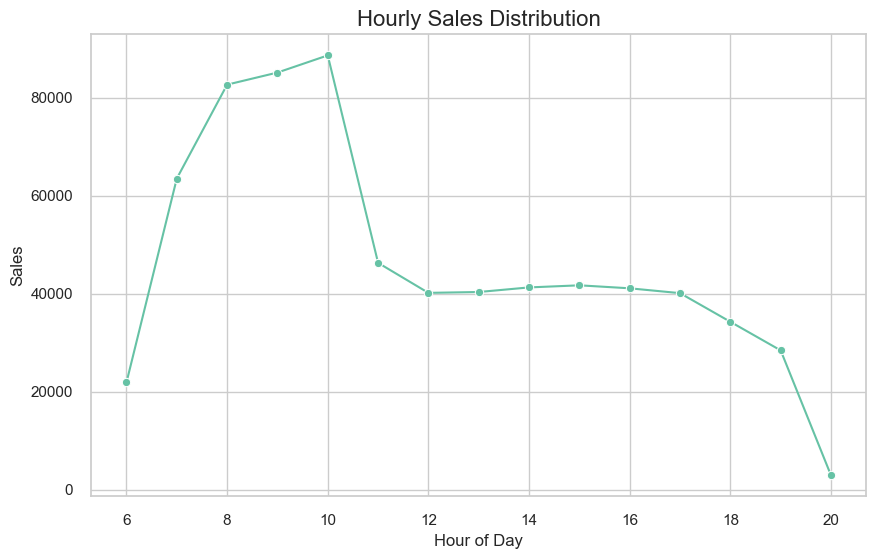

In [16]:
hourly_sales = df.groupby('Hour')['Sales'].sum()

sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Hourly Sales Distribution', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


# Top 10 Product Categories By Sales

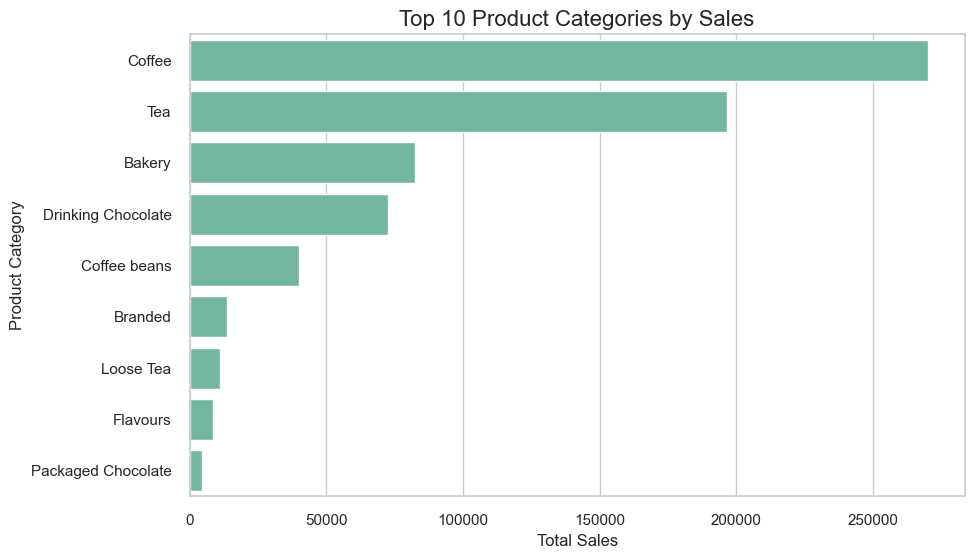

In [17]:
top_categories = df.groupby('product_category')['Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Product Categories by Sales', fontsize=16)
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()


# Top 10 Products by Quantity Sold

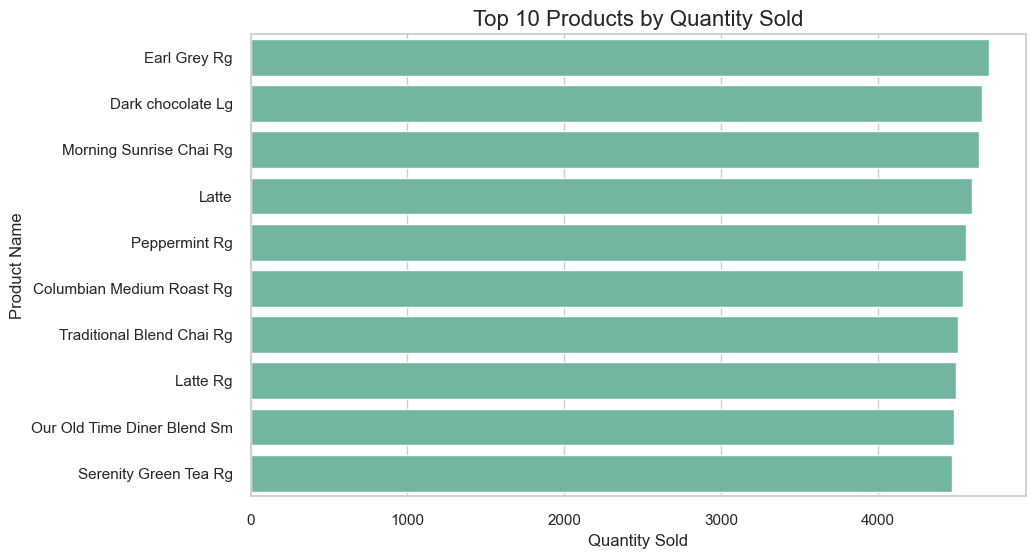

In [19]:
top_products = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


# Store-Wise Performance

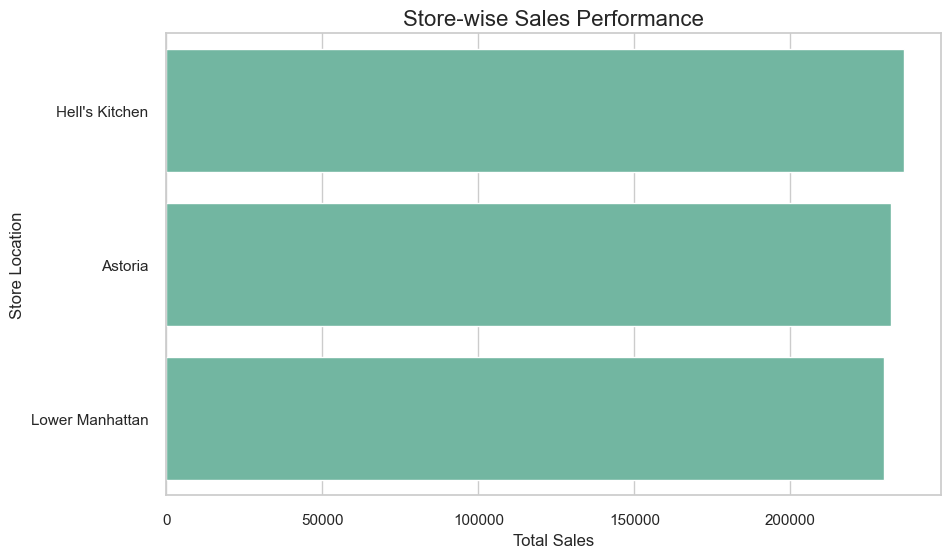

In [20]:
store_sales = df.groupby('store_location')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=store_sales.values, y=store_sales.index)
plt.title('Store-wise Sales Performance', fontsize=16)
plt.xlabel('Total Sales')
plt.ylabel('Store Location')
plt.show()


#visualising relationships between numeric columns like quantity, unit price, and sales.

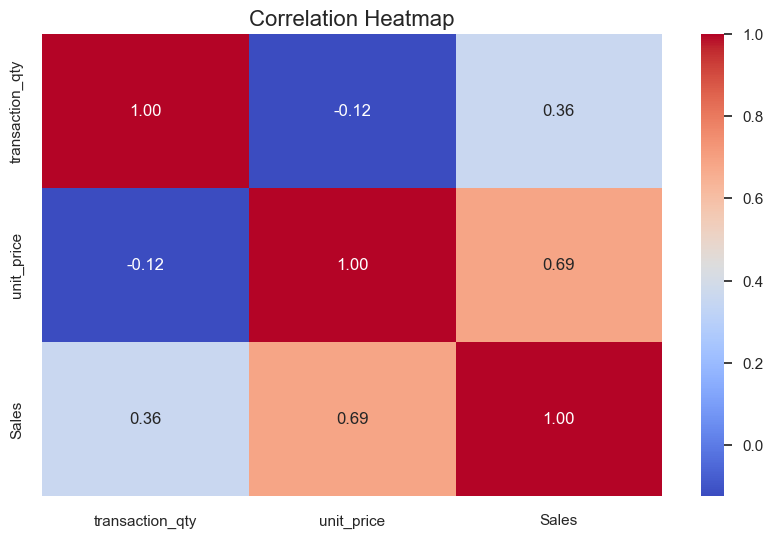

In [22]:
numeric_cols = ['transaction_qty', 'unit_price', 'Sales']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# Business Insights & KPI Calculations

#Total Revenue (Overall Sales)

In [24]:
total_revenue = df['Sales'].sum()
print(f"💰 Total Revenue: ₹{total_revenue:,.2f}")


💰 Total Revenue: ₹698,806.98


#Total Quantity Sold

In [25]:
total_qty = df['transaction_qty'].sum()
print(f"📦 Total Quantity Sold: {total_qty:,}")


📦 Total Quantity Sold: 214,467.0


#Average Order Value (AOV)

In [26]:
avg_order_value = df['Sales'].mean()
print(f"🧾 Average Order Value: ₹{avg_order_value:,.2f}")


🧾 Average Order Value: ₹4.69


#Total Number of Transaction

In [29]:
total_transactions = df['transaction_id'].nunique()
print(f"🛒 Total Transactions: {total_transactions:,}")


🛒 Total Transactions: 149,114


#Average Items per Transaction

In [31]:
avg_items = df['transaction_qty'].sum() / df['transaction_id'].nunique()
print(f"📊 Avg Items per Transaction: {avg_items:.2f}")


📊 Avg Items per Transaction: 1.44


#Top Performing Store (by Sales)

In [32]:
top_store = df.groupby('store_location')['Sales'].sum().sort_values(ascending=False).head(1)
print("🏬 Top Performing Store:\n", top_store)


🏬 Top Performing Store:
 store_location
Hell's Kitchen   236505.82
Name: Sales, dtype: float64


#Best-Selling Product Category

In [33]:
best_category = df.groupby('product_category')['Sales'].sum().sort_values(ascending=False).head(1)
print("🏷️ Best-Selling Category:\n", best_category)


🏷️ Best-Selling Category:
 product_category
Coffee   269948.70
Name: Sales, dtype: float64


#Peak Sales Hour

In [35]:
peak_hour = df.groupby('Hour')['Sales'].sum().sort_values(ascending=False).head(1)
print("⏰ Peak Sales Hour:\n", peak_hour)


⏰ Peak Sales Hour:
 Hour
10.00   88673.39
Name: Sales, dtype: float64


#Month with Highest Sales

In [37]:
top_month = df.groupby('Month')['Sales'].sum().sort_values(ascending=False).head(1)
print("📆 Month with Highest Sales:\n", top_month)


📆 Month with Highest Sales:
 Month
June   166480.53
Name: Sales, dtype: float64


#Correlation Insights

In [38]:
corr_matrix = df[['transaction_qty', 'unit_price', 'Sales']].corr()
print("📈 Correlation Matrix:\n", corr_matrix)


📈 Correlation Matrix:
                  transaction_qty  unit_price  Sales
transaction_qty             1.00       -0.12   0.36
unit_price                 -0.12        1.00   0.69
Sales                       0.36        0.69   1.00


In [39]:
df.to_csv("retail_sales_cleaned.csv", index=False)
print("✅ Cleaned dataset exported successfully for Power BI!")


✅ Cleaned dataset exported successfully for Power BI!
